# **MICROSOFT MOVIE STUDIO PROGRAM**
*****
 ## explanatory data analysis on which movies to produce
 * there are many movie studios producin movie which earn alot of profit so microsoft would like to do so
 * # objective:
 * microsoft wants to start a movie studio but they aren't sure on which type of movies to produce.
 * we are going to analyse trending movie types and their earnings, and aim to recommend microsoft with the best course of action.
 # deliverables
 - three actonable recommendation for microsoft based on our findings and analysis

# we first need to import the libraries which will help us in reading, cleaning and analtsing our data

In [130]:
#first import the neecessary libraries for our analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [131]:
# we retriev and read the data provided for our analysis
gross = pd.read_csv('bom.movie_gross.csv.gz')
basics = pd.read_csv('imdb.title.basics.csv.gz')
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

# **DATA CLEANING**


In [132]:
# we first go through each one to ensure that it clean
# start with gross
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# From this we can notice:
- our data contains five columns.
- it has 3387 rows


In [133]:
# we then check our data to see any missing values
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- we can see that there are some missing values in column two, three and four
- the forein gross is an oject instead of being a float

# we need to find the number of missing values and determine whether to fill or drop them
- this will help in our analysis to ensure that the values we get are are relistict and give us the actual trends

In [134]:
# finding number of missing values
gross.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


# since the number of missing studio files are few we can identify them and fill them appropriately

In [135]:
# identifying rows with missing studio values
missing_studio_values = gross[gross['studio'].isnull()].index
print(missing_studio_values)

Index([210, 555, 933, 1862, 2825], dtype='int64')


In [136]:
gross[gross['studio'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


# we create a dictionary to fill in the missing values
- we acquire the values by doing research on the internet

In [137]:
# creating a dictionary containing values for the missing data
missing_values = {210:'Tessalit Productions',
                  555:'Senator Entertainment',
                  933:'Senator Entertainment',
                  1862:'Indigo Films',
                  2825:'Aamir Khan Productions'}

# using the dictionary to fill in the values
for idx,studio_name in missing_values.items():
  gross.at[idx,'studio'] = studio_name

gross.isna().sum()

,0
title,0
studio,0
domestic_gross,28
foreign_gross,1350
year,0


# next we fill in the missing domestic gross values
- we have our data arrange in descending order and the number of missing values is not alot we can use back fill so as to mantain the order

In [138]:
gross['domestic_gross'] = gross['studio'].fillna(method='bfill')
gross.isna().sum()

/tmp/ipython-input-1549047370.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gross['domestic_gross'] = gross['studio'].fillna(method='bfill')


,0
title,0
studio,0
domestic_gross,0
foreign_gross,1350
year,0


In [139]:
# converting forein gross from object to float so that it may easily be used in our analysis and plotting
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'],errors='coerce')
gross['domestic_gross'] = pd.to_numeric(gross['foreign_gross'])

- since the number of missing foreign gross is high we cannot risk replacing the missing values as it may distort our data so we opt to dropping the rows with missing values

In [140]:
# dropping rows containing missing foreign gross values
gross.dropna(subset=['foreign_gross'], inplace=True)
gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2032 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2032 non-null   object 
 1   studio          2032 non-null   object 
 2   domestic_gross  2032 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2032 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.2+ KB


# we move on to check the ratings

In [141]:
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [142]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [143]:
# converting to numeric
ratings['averagerating'] = pd.to_numeric(ratings['averagerating'])
ratings['numvotes'] = pd.to_numeric(ratings['numvotes'])

In [144]:
ratings.isnull().sum()

,0
tconst,0
averagerating,0
numvotes,0


- we see that the ratings data is clean

# we move to clean basics

In [145]:
basics = pd.read_csv('imdb.title.basics.csv.gz')
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [146]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


- we can convert the start year and runtime minutes to numeric

In [147]:
basics['start_year'] = pd.to_numeric(basics['start_year'])
basics['runtime_minutes'] = pd.to_numeric(basics['runtime_minutes'])

In [148]:
# identifying the number of missing values
basics.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [149]:
# we have one missing value in primary title so we fill it directly
basics[basics['primary_title'].isnull()]
basics['primary_title'] = basics['primary_title'].fillna('Secret Superstar')

# next we move on to fill the missing original title values
- they are alittle more but we can create a dictionary and reaserch the missing data since it is a managable amount

In [150]:
# identifying the index with the missing data values
basics[basics['original_title'].isnull()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,NaN,2012,195.0,NaN
58624,tt3414266,The Outer Loop,NaN,2013,78.0,NaN
62944,tt3616658,The Hangman,NaN,2017,NaN,NaN
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,NaN
80116,tt4599436,Please Don't Eat the Pansies,NaN,2016,NaN,NaN
82058,tt4715728,Regen,NaN,2016,NaN,NaN
82308,tt4732998,Limbo,NaN,2017,NaN,NaN
85353,tt4940426,OldZilla,NaN,2018,NaN,NaN
98772,tt5774076,Secret Superstar,NaN,2015,NaN,"Action,Drama,Mystery"
104040,tt6092540,Rangreza,NaN,2017,NaN,NaN


In [151]:
# creating a dictionary containing the missing values and fill them in
missing_original_titles_by_index = {
    39095: 'Relatos salvajes',
    58624: 'The Outer Loop',
    62944: 'The Hangman',
    79274: 'Urban Legend: The Blind Side Strangler',
    80116: "Please Don't Eat the Pansies",
    82058: 'Regen',
    82308: 'Limbo',
    85353: 'OldZilla',
    98772: 'Secret Superstar',
    104040: 'Rangreza',
    104418: 'The Cage',
    107378: 'Deadly Affection',
    108971: 'What It Takes to Win',
    108983: 'Over Nor Out',
    111377: 'Samurai Cop 3',
    111899: 'The Work',
    112608: 'Utopians',
    115131: 'Hilfe, ich hab meine Eltern geschrumpft',
    115934: 'X A 7',
    115983: 'Hirugao: Love Affairs in the Afternoon',
    116205: 'Hasan Minhaj: Homecoming King',
    116350: 'unavailable'
}

for idx, missing_original_titles in missing_original_titles_by_index.items():
  basics.at[idx, 'original_title'] = missing_original_titles

basics.isnull().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,31739
genres,5408


# we then move to fill the missing runtime
- since the runtime of movies doesn't differ very much we will use the average runtime to fill the missing values

In [152]:
# filling the missing values using the mean
basics['runtime_minutes'] = basics['runtime_minutes'].fillna(basics['runtime_minutes'].mean())

basics.isna().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,5408


- with that every missing value has been replaced by the mean runtime

- Since the number of missing genres is alot we cannot use a dictionary nor can we use backfill, frontfill and the mode since it can bring up misleading understanding. The best course of action now is to drop the rows with missing values

In [153]:
#dropping rows with missing values
basics = basics.dropna(subset=['genres'])

basics.isnull().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,0


## **FEATURE ENGINEERING**

# Now that we are done cleaning we can move to feature engineering
- now that our data sets are clean we can combine them to get useful data
- we need to merge the data so as to use it to do our analysis so we have to check fo same columns which we can use so as to merge them

In [154]:
basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [155]:
gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [156]:
ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

- now that we know the columns, we can merge the ratings and basics based on the 'tconst column

In [157]:
# merging the columns
basics_ratings = pd.merge(basics,ratings,on = 'tconst', how = 'left')
basics_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War",NaN,NaN
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama,NaN,NaN
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary,NaN,NaN
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy,NaN,NaN


- we have now combined ratings and basics

- we now move to combining it with gross. we can use title, and primary title as the uniting factor. To do so we have to change the column 'title' to 'primary title'

In [158]:
# changing column name to primary title
gross.rename(columns={'title':'primary_title'}, inplace=True)

In [159]:
# merging the data sets
df = pd.merge(basics_ratings,gross, on='primary_title',how='left')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517.0,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War",NaN,NaN,NaN,NaN,NaN,NaN
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama,NaN,NaN,NaN,NaN,NaN,NaN
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary,NaN,NaN,NaN,NaN,NaN,NaN
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df.isnull().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,0
averagerating,67684
numvotes,67684
studio,138723
domestic_gross,138723


- now that we are through with merging, there are alot of rows with missing data so we can continue to drop all columns with any missing values

In [161]:
df = df.dropna()

we have now dropped all rows with missing values we can now fix the indexing of the rows



In [162]:
# fixing the indexing of the rows
df = df.reset_index(drop=True)
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.000000,"Adventure,Drama,Romance",6.1,37886.0,IFC,8000000.0,8000000.0,2012.0
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.000000,"Adventure,Comedy,Drama",7.3,275300.0,Fox,129900000.0,129900000.0,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.000000,"Action,Crime,Drama",6.5,105116.0,Uni.,26900000.0,26900000.0,2014.0
3,tt0372538,Spy,Spy,2011,110.000000,"Action,Crime,Drama",6.6,78.0,Fox,124800000.0,124800000.0,2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.000000,"Comedy,Drama",6.2,94787.0,FD,10800000.0,10800000.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,tt9392532,Neighbors,Neighbors,2018,90.000000,"Comedy,Drama",7.6,18.0,Uni.,120500000.0,120500000.0,2014.0
1817,tt9447594,The Gambler,The Gambler,2019,121.000000,"Action,Sci-Fi,Thriller",6.1,10.0,Par.,5600000.0,5600000.0,2014.0
1818,tt9816988,Gold,Tala,2019,86.187247,Drama,5.2,26.0,Wein.,7700000.0,7700000.0,2017.0
1819,tt9851050,Sisters,Sisters,2019,86.187247,"Action,Drama",4.7,14.0,Uni.,18000000.0,18000000.0,2015.0


# we can check our data for outliers

Text(0.5, 0, 'runtime in minutes')

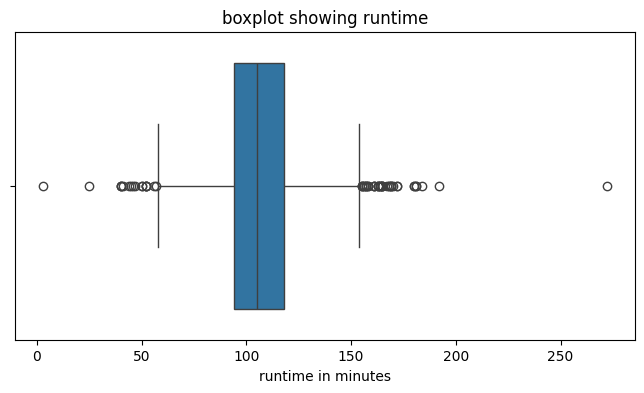

In [163]:
# we use a boxplot to check
plt.figure(figsize=(8,4))
sns.boxplot(x=df['runtime_minutes'])
plt.title('boxplot showing runtime')
plt.xlabel('runtime in minutes')

- there is three outliers in our runtime which do not significantly affect the data.

# **DATA ANALYSIS AND VISUALIZATIONS**

# we will now check the correlation between our data

In [164]:
correlation = df.select_dtypes(include='number').corr()
correlation

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
start_year,1.000000,0.074802,-0.020411,-0.052337,0.121540,0.121540,0.805611
runtime_minutes,0.074802,1.000000,0.245398,0.336479,0.196376,0.196376,0.059708
averagerating,-0.020411,0.245398,1.000000,0.363252,0.152904,0.152904,0.018677
numvotes,-0.052337,0.336479,0.363252,1.000000,0.560130,0.560130,-0.070190
domestic_gross,0.121540,0.196376,0.152904,0.560130,1.000000,1.000000,0.130427
foreign_gross,0.121540,0.196376,0.152904,0.560130,1.000000,1.000000,0.130427
year,0.805611,0.059708,0.018677,-0.070190,0.130427,0.130427,1.000000


Text(0.5, 1.0, 'correlation heatmap')

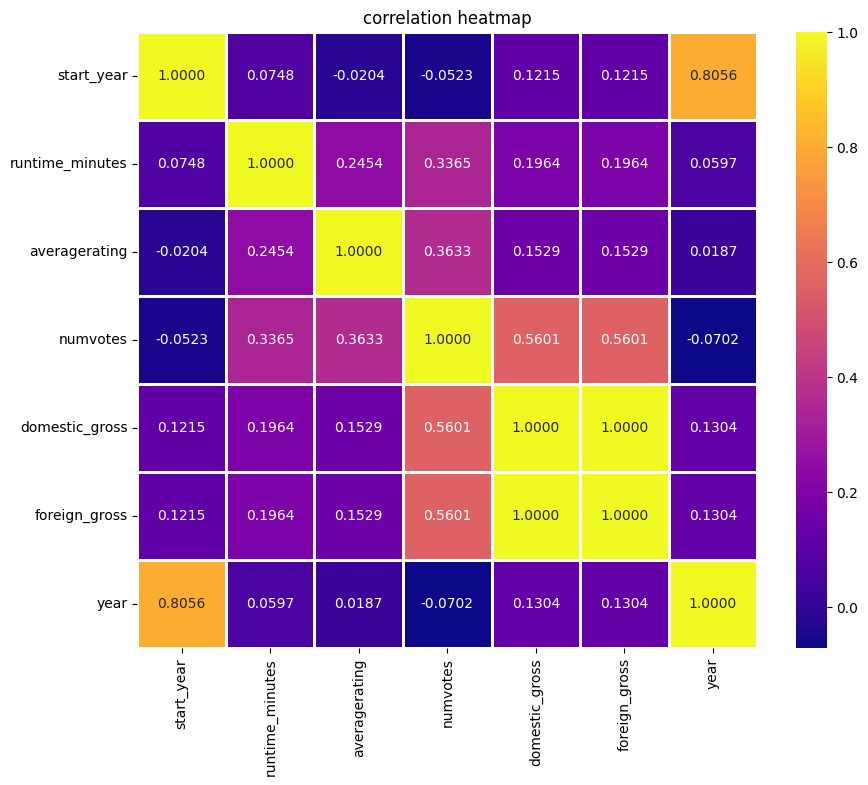

In [165]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt='.4f',cmap='plasma',linewidths=1)
plt.title('correlation heatmap')

- from this we can deduce that there is a Strong correlation between the domestic and foreign gross, which means that movies which earn high domestic income also end to earn high earnings internationally
- here is a weak correlation between the start year and the runtime which generally means that the runtime of movies hasn't really changed over the years
-there is a slight correlation between the number of votes and the average rating, implicates some of the movies with higher number of votes tend to get a higher rating
-

- we can also check which lenght of movies are prefered by people

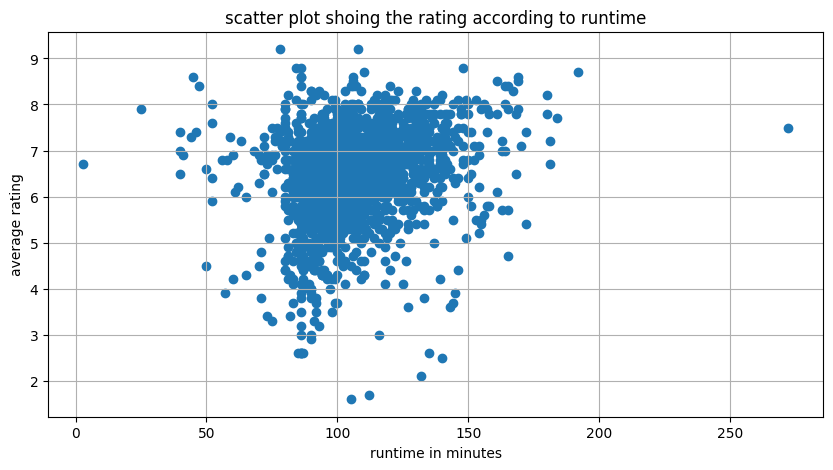

In [166]:
plt.figure(figsize=(10,5))
plt.scatter(df['runtime_minutes'],df['averagerating'])
plt.xlabel('runtime in minutes')
plt.ylabel('average rating')
plt.title('scatter plot shoing the rating according to runtime')
plt.grid(True)

- we can see that movies with a runtime of between a hundred and ahundred and fifty minutes get a higher rating

- wwe want to see the rating according to the genres which will help figure out which type of movies are liked the most.
- we have to first split the genres since they are several in one row, we have to make them to list

In [167]:
# split the genres separated by commas
df['genres'] = df['genres'].str.split(',')
# explode into multiple rows each genre by row
df = df.explode('genres')
# we now group according to genre and calulate the mean rating
averagerating_per_genre = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.000000,Adventure,6.1,37886.0,IFC,8000000.0,8000000.0,2012.0
0,tt0337692,On the Road,On the Road,2012,124.000000,Drama,6.1,37886.0,IFC,8000000.0,8000000.0,2012.0
0,tt0337692,On the Road,On the Road,2012,124.000000,Romance,6.1,37886.0,IFC,8000000.0,8000000.0,2012.0
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.000000,Adventure,7.3,275300.0,Fox,129900000.0,129900000.0,2013.0
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.000000,Comedy,7.3,275300.0,Fox,129900000.0,129900000.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,tt9447594,The Gambler,The Gambler,2019,121.000000,Thriller,6.1,10.0,Par.,5600000.0,5600000.0,2014.0
1818,tt9816988,Gold,Tala,2019,86.187247,Drama,5.2,26.0,Wein.,7700000.0,7700000.0,2017.0
1819,tt9851050,Sisters,Sisters,2019,86.187247,Action,4.7,14.0,Uni.,18000000.0,18000000.0,2015.0
1819,tt9851050,Sisters,Sisters,2019,86.187247,Drama,4.7,14.0,Uni.,18000000.0,18000000.0,2015.0


- now that we have dealt with that we can move on to plot and see their relationship and how diffrent genres affect the rating
- we are going to use a bar plot

Text(0.5, 1.0, 'barplot showing rating according to genre')

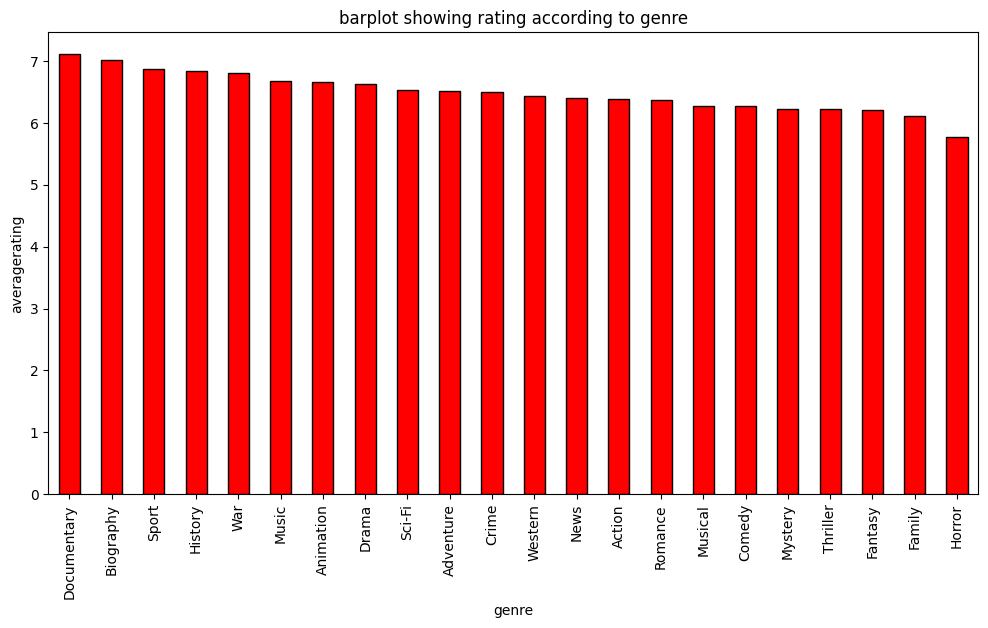

In [168]:
plt.figure(figsize=(12,6))
averagerating_per_genre.plot(kind='bar', color='red',edgecolor='black')
plt.ylabel('averagerating')
plt.xlabel('genre')
plt.title('barplot showing rating according to genre')

- we can see that documentaries get the highest rating

In [169]:
genre_frequecy = df['genres'].value_counts()
genre_frequecy

,count
genres,
Drama,962
Comedy,607
Action,466
Adventure,368
Thriller,296
Romance,255
Crime,245
Horror,164
Biography,160


we can see that even though drama has the highest frequency it isn't the highest in rating.

# **CONCLUSION AND RECOMENDATIONS**



1. Microsoft should try and make movies which will perform well locally as this gurantees the movie's success internationally. This will enable them earn high profits hence making the studio managable and profitable  

2. The movies they produce should have the runtime within a range of 100-150 minutes because it is preferred by many people
3. They should focus on genres such as: - documentaries
                                        - action
                                        - biography
                                        - sports
                                        - sci-fi
    these genres have showed consistent good results hence they will be loved by the audience.




# There should also have a fitting logo which will help advertise the studio
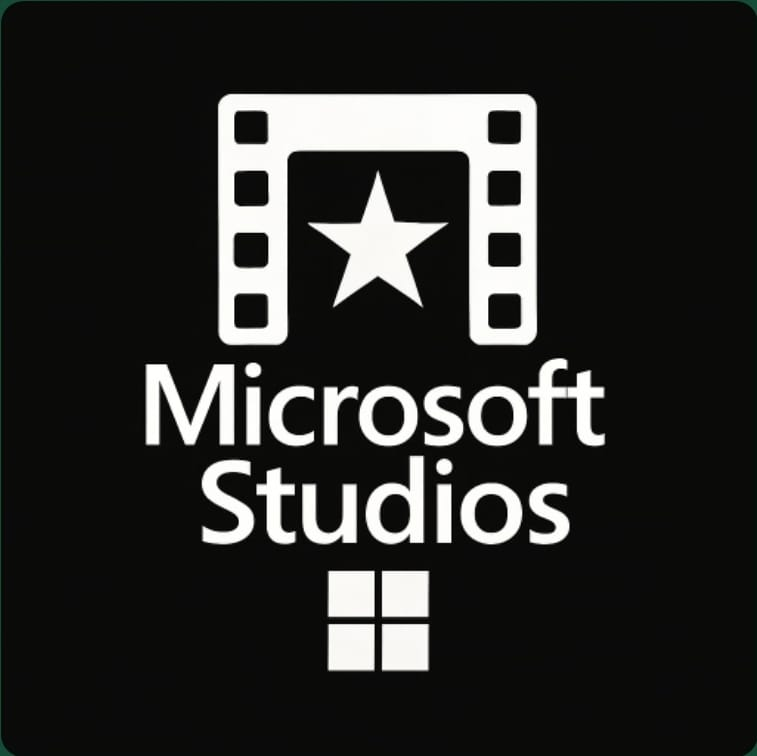

* Thank you for givig me your time and I hope that my findings will be able to assist in making the foundation of your studio